  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58829  100 58829    0     0  1222k      0 --:--:-- --:--:-- --:--:-- 1222k

				Original Image


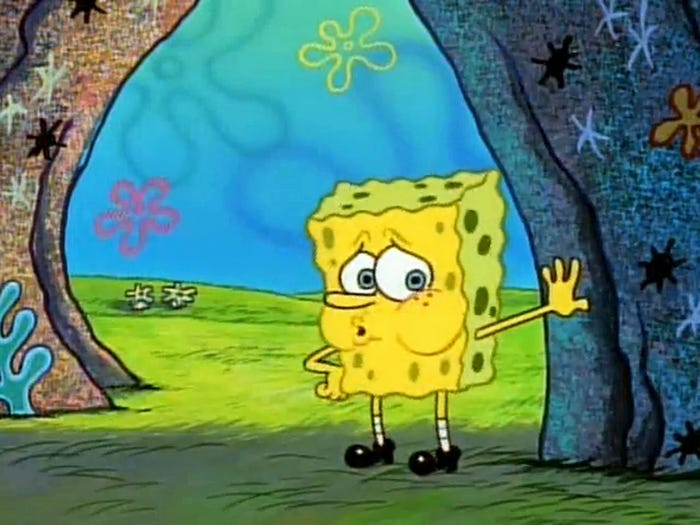



				Rotated Image


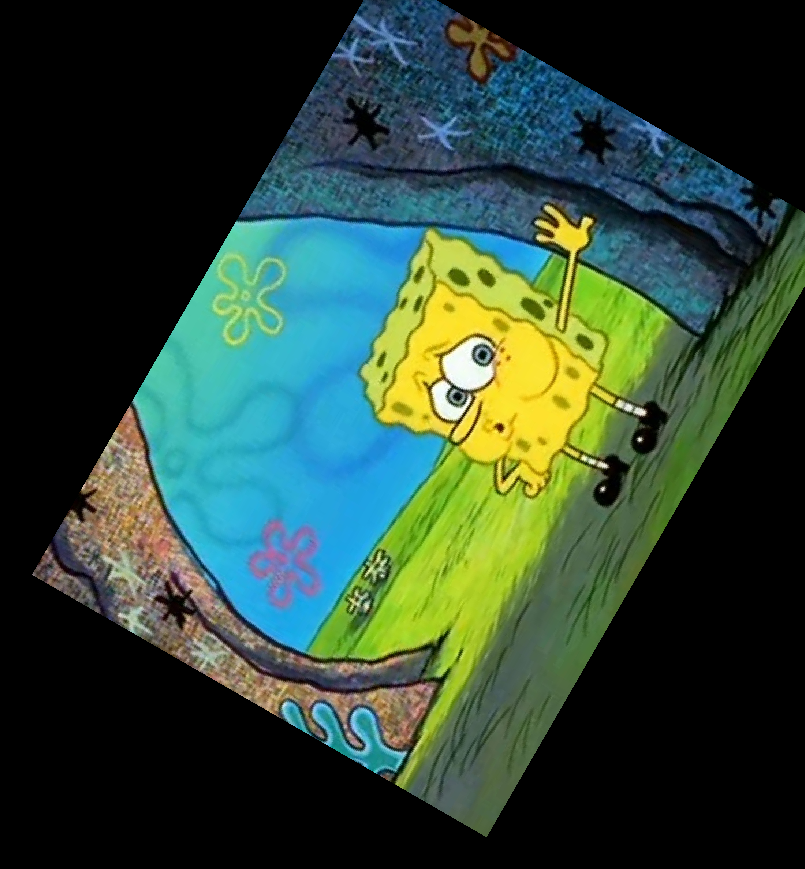

In [22]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as imshow
import numpy as np
import math
from matplotlib import pyplot as plt

!curl -o nplate.jpg https://pbs.twimg.com/media/E-Zan-zXEAAMT2-.jpg

def img_rotation(img, angle):   # accepts any image and angle in degrees
  angle = math.radians(angle)   #converting degrees to radians
  cosine = math.cos(angle)
  sine = math.sin(angle)
  height = img.shape[0]                                   # storing the height of the image
  width = img.shape[1]                                    #storing the width of the image
  # Height and width of the new rotated image
  new_height = round(abs(height*cosine) + abs(width*sine))
  new_width = round(abs(width*cosine) + abs(height*sine))
  new_img = np.uint8(np.zeros((new_height, new_width, img.shape[2])))  # define another image variable of dimensions of new height and width filled with zeros
  
  # Find the center of the image about which we have to rotate the image (since we'll be rotation around the center)
  centre_x = width // 2    # with respect to the original image width
  centre_y = height // 2    # with respect to the original image height

  # Find the new centre points of the new rotated image that will be obtained
  new_centre_width = new_width // 2     # new center with respect to the new image width
  new_centre_height = new_height // 2      # new center with respect to the new image height
     
  for i in range(new_height):
    for j in range(new_width):
      # using rotation matrix to find new coordinates x and y
      ''' subtracting the new center point coordinates so that center point will have (0,0) value before applying 
          the equations to calculate the new coordinate values'''
      x_new = (i-new_centre_width)*cosine + (j-new_centre_height)*sine
      y_new = (j-new_centre_height)*cosine - (i-new_centre_width)*sine 

      # adding center points of the old image to the new coordinates of rotated image. 
      x_new = round(x_new) + centre_y
      y_new = round(y_new) + centre_x

      ''' this condition ensures that new coordinates values x and y of the rotated image should not go beyond the size of 
          the image thus we only consider those points which are inside the size of the image'''
      if (x_new >= 0 and y_new >=0 and x_new < height and  y_new < width):
        new_img[i, j, :] = img[x_new, y_new, :]

  return new_img 

img = cv2.imread('nplate.jpg')  
print("\n\t\t\t\tOriginal Image")
imshow(img)
rot = img_rotation(img,60)
print("\n\n\t\t\t\tRotated Image")
imshow(rot)